In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
covidData = pd.read_csv('complete.csv')

In [17]:
covidData

,Date,Name of State / UT,Latitude,Longitude,Infected,Deaths,Recovered
0,30-01-2020,Kerala,10.8505,76.2711,0,0,0
1,31-01-2020,Kerala,10.8505,76.2711,0,0,0
2,01-02-2020,Kerala,10.8505,76.2711,1,0,0
3,02-02-2020,Kerala,10.8505,76.2711,1,0,0
4,03-02-2020,Kerala,10.8505,76.2711,0,0,0
...,...,...,...,...,...,...,...
3715,09-07-2020,Telangana,18.1124,79.0193,1924,11,992
3716,09-07-2020,Tripura,23.9408,91.9882,57,0,76
3717,09-07-2020,Uttar Pradesh,26.8467,80.9462,1188,18,704
3718,09-07-2020,Uttarakhand,30.0668,79.0193,28,3,29


In [21]:
covid_infected = covidData[['Date','Infected']]

In [22]:
covid_infected.head()

,Date,Infected
0,30-01-2020,0
1,31-01-2020,0
2,01-02-2020,1
3,02-02-2020,1
4,03-02-2020,0


In [23]:
covid_infected.columns = ['ds','y']

In [26]:
covid_infected.head()

,ds,y
0,30-01-2020,0
1,31-01-2020,0
2,01-02-2020,1
3,02-02-2020,1
4,03-02-2020,0


In [27]:
covid_infected['ds'] = pd.to_datetime(covid_infected['ds'],dayfirst=True)

C:\Users\Himank Khandelwal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
covid_infected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3720 non-null   datetime64[ns]
 1   y       3720 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 58.2 KB


In [107]:
#covid_infected.set_index('ds',inplace=True)
#covid_infected = covid_infected.resample('D').sum()
covid_infected.reset_index(inplace = True)

In [108]:
m = Prophet()
m.fit(covid_infected)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
future = m.make_future_dataframe(periods = 36)

In [110]:
forcast = m.predict(future)

In [111]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1534.388297,-6828.429006,5347.402034,-1534.388297,-1534.388297,762.262420,762.262420,762.262420,762.262420,762.262420,762.262420,0.0,0.0,0.0,-772.125877
1,2020-01-31,-1492.005422,-8993.223863,3867.945797,-1492.005422,-1492.005422,-752.133841,-752.133841,-752.133841,-752.133841,-752.133841,-752.133841,0.0,0.0,0.0,-2244.139263
2,2020-02-01,-1449.622546,-7422.468800,4000.738929,-1449.622546,-1449.622546,-167.673544,-167.673544,-167.673544,-167.673544,-167.673544,-167.673544,0.0,0.0,0.0,-1617.296090
3,2020-02-02,-1407.239671,-6364.151361,6503.068945,-1407.239671,-1407.239671,1340.058713,1340.058713,1340.058713,1340.058713,1340.058713,1340.058713,0.0,0.0,0.0,-67.180957
4,2020-02-03,-1364.856795,-8545.613784,4192.860738,-1364.856795,-1364.856795,-806.959109,-806.959109,-806.959109,-806.959109,-806.959109,-806.959109,0.0,0.0,0.0,-2171.815904


In [112]:
forcast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [113]:
forcast[['ds','yhat_lower', 'yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2020-01-30,-6828.429006,5347.402034,-772.125877
1,2020-01-31,-8993.223863,3867.945797,-2244.139263
2,2020-02-01,-7422.468800,4000.738929,-1617.296090
3,2020-02-02,-6364.151361,6503.068945,-67.180957
4,2020-02-03,-8545.613784,4192.860738,-2171.815904
...,...,...,...,...
193,2020-08-10,22898.242930,35304.242911,29114.067097
194,2020-08-11,24788.162290,37227.668141,30980.077291
195,2020-08-12,23402.950239,35619.835564,29394.809116
196,2020-08-13,25542.890093,37674.286841,31591.677261


<Figure size 2160x360 with 0 Axes>

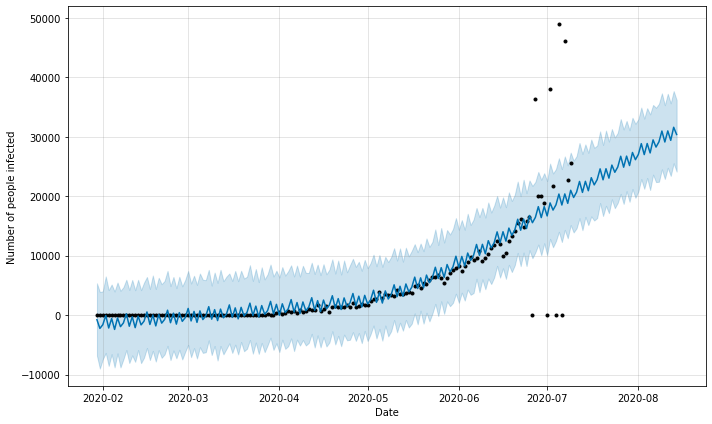

In [122]:
plt.figure(figsize=(30,5))
m.plot(forcast)
plt.xlabel("Date")
plt.ylabel("Number of people infected")
plt.savefig('Number of people Infected forcast.png')

In [162]:
covid_Recovered = covidData[['Date','Recovered']]

In [163]:
covid_Recovered.head()

,Date,Recovered
0,30-01-2020,0
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,0
4,03-02-2020,0


In [164]:
covid_Recovered.columns = ['ds','y']

In [165]:
covid_Recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      3720 non-null   object
 1   y       3720 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.2+ KB


In [166]:
covid_Recovered['ds'] = pd.to_datetime(covid_Recovered['ds'],dayfirst=True)

C:\Users\Himank Khandelwal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
#covid_Recovered.set_index('ds',inplace=True)
#covid_Recovered = covid_Recovered.resample('D').sum()
#covid_Recovered.reset_index(inplace = True)


,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
157,2020-07-05,29191
158,2020-07-06,0
159,2020-07-07,30865
160,2020-07-08,16883


In [181]:
ts = Prophet()
ts.fit(covid_Recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [182]:
future = ts.make_future_dataframe(periods = 36)

In [183]:
forcast = ts.predict(future)

In [184]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-897.506261,-4667.998596,3901.639392,-897.506261,-897.506261,483.066934,483.066934,483.066934,483.066934,483.066934,483.066934,0.0,0.0,0.0,-414.439326
1,2020-01-31,-876.791240,-5821.321572,3237.016195,-876.791240,-876.791240,-395.799205,-395.799205,-395.799205,-395.799205,-395.799205,-395.799205,0.0,0.0,0.0,-1272.590445
2,2020-02-01,-856.076220,-4945.528345,3264.099787,-856.076220,-856.076220,42.753900,42.753900,42.753900,42.753900,42.753900,42.753900,0.0,0.0,0.0,-813.322320
3,2020-02-02,-835.361199,-4261.922762,4359.094242,-835.361199,-835.361199,819.923104,819.923104,819.923104,819.923104,819.923104,819.923104,0.0,0.0,0.0,-15.438095
4,2020-02-03,-814.646179,-5908.395206,2474.716196,-814.646179,-814.646179,-856.780460,-856.780460,-856.780460,-856.780460,-856.780460,-856.780460,0.0,0.0,0.0,-1671.426639


In [185]:
forcast[['ds','yhat_lower', 'yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2020-01-30,-4667.998596,3901.639392,-414.439326
1,2020-01-31,-5821.321572,3237.016195,-1272.590445
2,2020-02-01,-4945.528345,3264.099787,-813.322320
3,2020-02-02,-4261.922762,4359.094242,-15.438095
4,2020-02-03,-5908.395206,2474.716196,-1671.426639
...,...,...,...,...
193,2020-08-10,15010.450665,23885.400929,19457.868459
194,2020-08-11,16796.171147,25240.461570,21087.286909
195,2020-08-12,16107.135784,24519.612641,20074.680629
196,2020-08-13,17217.864490,25343.824373,21423.549825


<Figure size 2160x360 with 0 Axes>

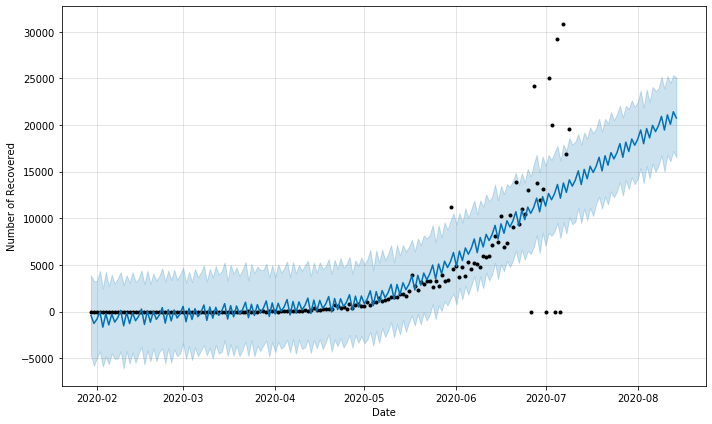

In [187]:
plt.figure(figsize=(30,5))
ts.plot(forcast)
plt.xlabel("Date")
plt.ylabel("Number of Recovered")
plt.savefig('Number of people Recovered forcast.png')